In [1]:
import os
from google.colab import drive
 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd '/content/gdrive/My Drive/Imagetrain'

/content/gdrive/My Drive/Imagetrain


In [3]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
##Setting the size and image path
IMAGE_SIZE = [224, 224]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'

In [5]:
##not including the fully connected layers and setting the image size to 227*227 and not training all the layers since we are using transfer learning(keep the weights as same)
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False

In [6]:
## Doing Flattening and connecting to end layer of 2 neurons and using softmax as activation(sigmoid can be used with one neuron)
x = Flatten()(vgg.output)
prediction = Dense(2, activation='softmax')(x)

model = Model(vgg.input,prediction)

In [7]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [8]:
##Compiling the model 
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

##Doing augmentation on the train data and scaling

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


##Only Scaling the test data

In [11]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [12]:
final = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
13/13 [==============================] - 334s 26s/step - loss: 1.7594 - accuracy: 0.4880 - val_loss: 0.5770 - val_accuracy: 0.6716
Epoch 2/20
13/13 [==============================] - 333s 26s/step - loss: 0.7703 - accuracy: 0.6058 - val_loss: 0.5022 - val_accuracy: 0.7164
Epoch 3/20
13/13 [==============================] - 327s 25s/step - loss: 0.4857 - accuracy: 0.7837 - val_loss: 0.6385 - val_accuracy: 0.6716
Epoch 4/20
13/13 [==============================] - 327s 25s/step - loss: 0.3544 - accuracy: 0.8462 - val_loss: 0.4441 - val_accuracy: 0.7687
Epoch 5/20
13/13 [==============================] - 327s 25s/step - loss: 0.3571 - accuracy: 0.8438 - val_loss: 0.4277 - val_accuracy: 0.7985
Epoch 6/20
13/13 [==============================] - 325s 25s/step - loss: 0.3295 - accuracy: 0.8389 - val_loss: 0.3837 - val_accuracy: 0.8209
Epoch 7/20
13/13 [==============================] - 327s 25s/step - loss

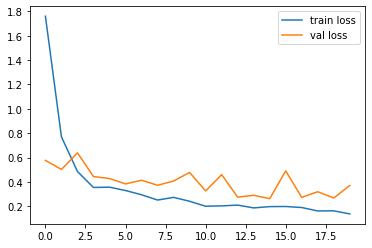

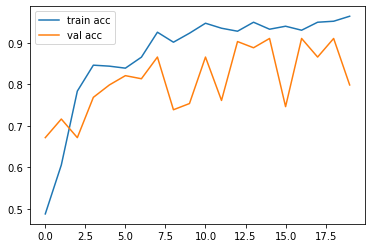

<Figure size 432x288 with 0 Axes>

In [13]:
# plot the loss
plt.plot(final.history['loss'], label='train loss')
plt.plot(final.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(final.history['accuracy'], label='train acc')
plt.plot(final.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

##Saving the model and doing predictions

In [14]:
from tensorflow.keras.models import load_model

model.save('modelv19_malaria.h5')

In [15]:
y_pred = model.predict(test_set)

In [16]:
y_pred

array([[9.70548153e-01, 2.94517931e-02],
       [9.33946133e-01, 6.60538524e-02],
       [1.49037063e-01, 8.50962937e-01],
       [9.99137998e-01, 8.62007146e-04],
       [5.51812127e-02, 9.44818854e-01],
       [9.36063826e-01, 6.39362112e-02],
       [9.78093594e-02, 9.02190626e-01],
       [2.30382115e-01, 7.69617915e-01],
       [1.41163051e-01, 8.58837008e-01],
       [6.01822555e-01, 3.98177445e-01],
       [9.85705614e-01, 1.42943580e-02],
       [9.84617114e-01, 1.53829185e-02],
       [4.01566103e-02, 9.59843397e-01],
       [3.18540297e-02, 9.68145967e-01],
       [9.98394907e-01, 1.60503795e-03],
       [9.99198854e-01, 8.01168149e-04],
       [9.98586416e-01, 1.41362217e-03],
       [5.69074392e-01, 4.30925578e-01],
       [1.35860607e-01, 8.64139378e-01],
       [7.20559061e-01, 2.79440969e-01],
       [1.51884511e-01, 8.48115444e-01],
       [9.38523710e-02, 9.06147599e-01],
       [4.20665175e-01, 5.79334855e-01],
       [9.99911547e-01, 8.84936890e-05],
       [9.349451

In [18]:
##Taking the maximum value amongst the two
y_pred_val = np.argmax(y_pred, axis=1)

In [19]:
y_pred_val

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1])

In [21]:
!ls

AccVal_acc.png	cnn  cnn1  Dataset  LossVal_loss.png  modelv19_malaria.h5


##Testing on Images

uninfected


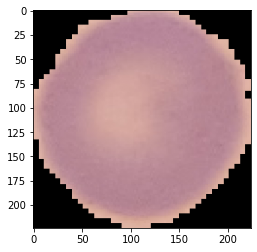

In [24]:
img = image.load_img("Dataset/Test/Uninfected/C3thin_original_IMG_20150608_163002_cell_32.png",target_size=(224,224)) ##loading the image
img = np.asarray(img) ##converting to an array
img = img / 255 ##scaling by doing a division of 255
plt.imshow(img)
img = np.expand_dims(img, axis=0) ##expanding the dimensions
from keras.models import load_model
saved_model = load_model("modelv19_malaria.h5") ##loading the model
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("Infected")
else:
    print('uninfected')

Infected


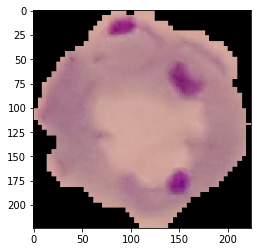

In [25]:
img1 = image.load_img("Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_14.png",target_size=(224,224))
img1 = np.asarray(img1)
img1 = img1 / 255
plt.imshow(img1)
img1= np.expand_dims(img1, axis=0)
output = saved_model.predict(img1)
if output[0][0] > output[0][1]:
    print("Infected")
else:
    print('uninfected')